In [18]:
import numpy as np 
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [19]:
!pip install wolta

# Data Init

In [20]:
from glob import glob
from wolta.data_tools import load_by_parts

paths = glob('archive_harth/train.csv')
df = load_by_parts(paths, shuffle=True)

# Data Analysis

In [21]:
df.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Activity
0,-1.241699,-0.607422,-0.385254,-1.983887,-0.022705,-2.063721,1.0
1,0.088379,-0.252441,-0.208984,-1.979736,-0.484619,-2.411377,2.0
2,-0.714813,0.035192,-0.702726,0.073036,0.078241,1.002387,7.0
3,-0.085216,1.006499,0.034879,-0.091834,0.980526,0.091944,8.0
4,-1.611328,0.263184,-0.442627,-1.441406,0.056641,0.040771,2.0


In [22]:
df.shape

(5267996, 7)

In [24]:
from wolta.data_tools import col_types

types = col_types(df, print_columns=True)

Feature_1: float64
Feature_2: float64
Feature_3: float64
Feature_4: float64
Feature_5: float64
Feature_6: float64
Activity: float64


In [25]:
from wolta.data_tools import seek_null

seeked = seek_null(df, print_columns=True)

In [26]:
from wolta.data_tools import unique_amounts

unique_amounts(df)

{'Feature_1': 849249,
 'Feature_2': 712150,
 'Feature_3': 1204601,
 'Feature_4': 1372309,
 'Feature_5': 1005253,
 'Feature_6': 1255101,
 'Activity': 12}

In [27]:
df.describe()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Activity
count,5.267996e+06,5.267996e+06,5.267996e+06,5.267996e+06,5.267996e+06,5.267996e+06,5.267996e+06
mean,-8.912936e-01,-1.235684e-02,-1.746747e-01,-5.929528e-01,2.079528e-02,3.865788e-01,6.715370e+00
std,3.654646e-01,2.272979e-01,3.597894e-01,6.213003e-01,3.866165e-01,7.293941e-01,1.120623e+01
min,-8.000000e+00,-4.307617e+00,-6.574463e+00,-8.000000e+00,-7.997314e+00,-8.000000e+00,1.000000e+00
25%,-1.002718e+00,-7.864500e-02,-3.752620e-01,-9.740560e-01,-1.035160e-01,-1.430862e-01,3.000000e+00
50%,-9.760540e-01,5.398000e-03,-1.407800e-01,-4.182705e-01,3.008800e-02,7.641855e-01,7.000000e+00
75%,-8.331670e-01,7.414000e-02,4.400400e-02,-1.787110e-01,1.544010e-01,9.480780e-01,7.000000e+00
max,2.291708e+00,6.491943e+00,4.909483e+00,7.999756e+00,7.999756e+00,8.406235e+00,1.400000e+02


In [28]:
from wolta.data_tools import stat_sum

stat_sum(df,
        ['max', 'min', 'width', 'var', 'med'])

Feature_1
max: 2.291708
min: -8.0
width: 10.291708
variance: 0.13356435943371256
median: -0.976054
***
Feature_2
max: 6.491943
min: -4.307617
width: 10.79956
variance: 0.051664336599623883
median: 0.005398
***
Feature_3
max: 4.909483
min: -6.574463
width: 11.483946
variance: 0.1294484078058243
median: -0.14078
***
Feature_4
max: 7.999756
min: -8.0
width: 15.999756
variance: 0.38601393632383096
median: -0.4182705
***
Feature_5
max: 7.999756
min: -7.997314
width: 15.99707
variance: 0.14947227295393817
median: 0.030088
***
Feature_6
max: 8.406235
min: -8.0
width: 16.406235000000002
variance: 0.532015616701573
median: 0.7641855
***
Activity
max: 140.0
min: 1.0
width: 139.0
variance: 125.57949032675644
median: 7.0
***


<Axes: ylabel='count'>

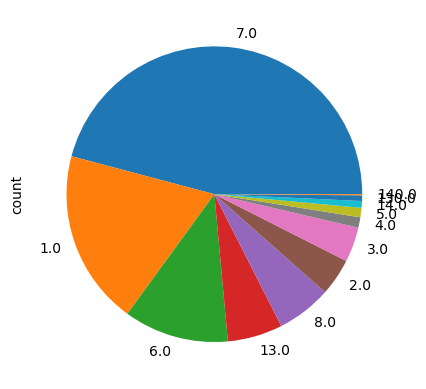

In [29]:
df['Activity'].value_counts().plot(kind='pie')

# Data Preparation

In [30]:
df = df[(df['Activity'] == 1.0) | (df['Activity'] == 6.0) | (df['Activity'] == 7.0)]

<Axes: ylabel='count'>

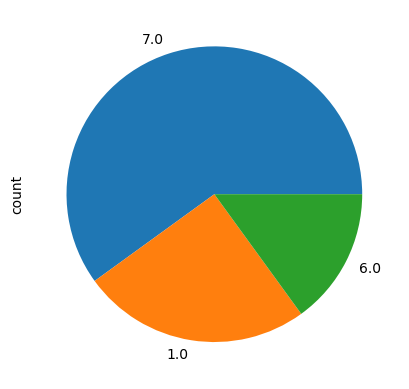

In [31]:
df['Activity'].value_counts().plot(kind='pie')

In [32]:
from wolta.data_tools import expand_df

df = expand_df(df, 'Activity', 'not majority')

<Axes: ylabel='count'>

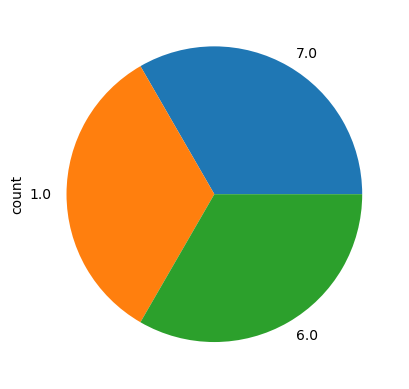

In [13]:
df['Activity'].value_counts().plot(kind='pie')

In [33]:
y = df['Activity'].values
del df['Activity']
X = df.values
del df

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
del X, y

In [35]:
from collections import Counter

print(Counter(y_train))
print(Counter(y_test))

Counter({6.0: 1932829, 1.0: 1932829, 7.0: 1932828})
Counter({7.0: 483208, 6.0: 483207, 1.0: 483207})


# Model

In [ ]:
from wolta.model_tools import compare_models

results = compare_models('clf',
                        ['ada', 'cat', 'lbm', 'raf', 'dtr', 'ext', 'rdg', 'per'],
                        ['acc', 'precision'],
                        X_train, y_train, X_test, y_test,
                        get_result=True)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost
Accuracy Score: 0.9158766906131391
Precision Score: 0.916227124028432
***


In [ ]:
from wolta.model_tools import get_best_model

model = get_best_model(results, 'acc', 'clf', X_train, y_train, behavior='max-best')
y_pred = model.predict(X_test)

Best Algorithm is raf with the score of 0.9787956284429112


In [ ]:
from sklearn.metrics import classification_report as rep

print(rep(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.97      0.97      0.97    580540
         6.0       0.97      0.97      0.97    580541
         7.0       1.00      1.00      1.00    580541

    accuracy                           0.98   1741622
   macro avg       0.98      0.98      0.98   1741622
weighted avg       0.98      0.98      0.98   1741622



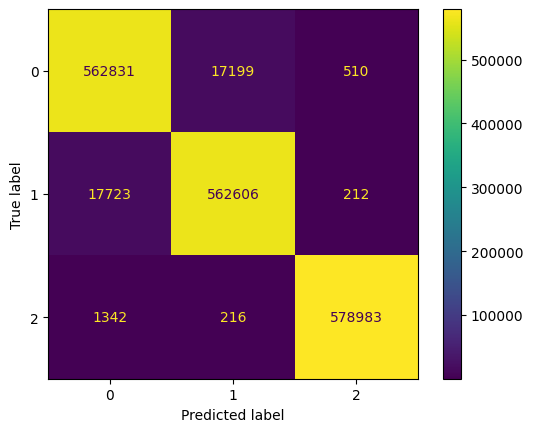

In [ ]:
from sklearn.metrics import confusion_matrix as conf
from sklearn.metrics import ConfusionMatrixDisplay as cmd

cm = conf(y_test, y_pred)
disp = cmd(confusion_matrix=cm)
disp.plot()